# 최소자승법

import부터 하자.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## `np.poly1d` 사용하기

$x^2 + 2x + 3$이라는 다항식을 만들어 보자.

In [2]:
a = np.poly1d([1, 2, 3])
print(a)
print(repr(a))

   2
1 x + 2 x + 3
poly1d([1, 2, 3])


$(x - 1)(x + 1)(x - 2)$와 같은 근 형식으로 나타내 보자.

In [3]:
b = np.poly1d([1, -1, 2], True)
print(b)
print(repr(b))

   3     2
1 x - 2 x - 1 x + 2
poly1d([ 1., -2., -1.,  2.])


계수를 어떻게 가져올까?

In [4]:
b[0]

2.0

In [5]:
b[1]

-1.0

In [6]:
b[2]

-2.0

In [7]:
b[3]

1.0

In [8]:
b[4]

0

그래프를 그려보자.

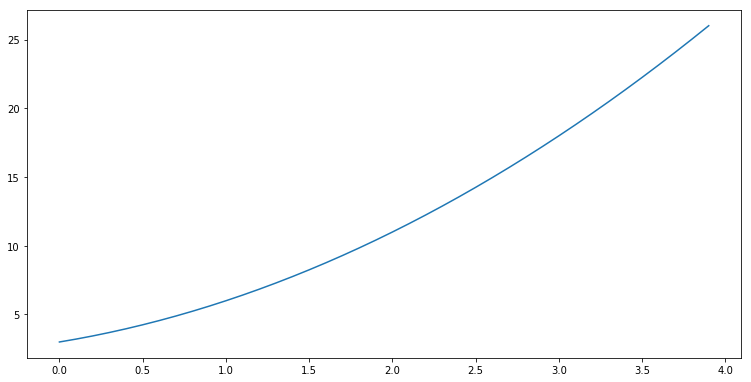

In [9]:
t = np.arange(0, 4, 0.1)
plt.figure(figsize=(12.8, 6.4))
plt.plot(t, a(t))
plt.show()

## `np.polyfit`

최소자승법을 이용하자.

In [10]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])
z = np.polyfit(x, y, 1)
result = np.poly1d(z)

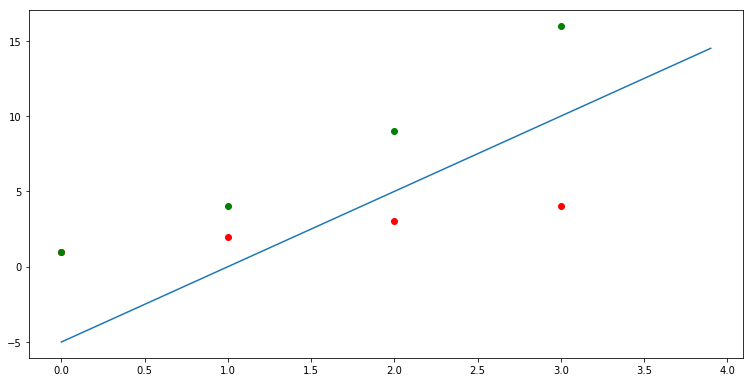

In [11]:
t2 = np.array([0, 1, 2, 3])
plt.figure(figsize=(12.8, 6.4))
plt.plot(t2, x, 'ro')
plt.plot(t2, y, 'go')
plt.plot(t, result(t), '-')
plt.show()

## 표준편차 구하기

다음과 같은 식을 이용한다.

$$
\sigma_Y = \sqrt{\frac{1}{n - 2} \sum_{i=1}^{n} (Y_i - f(x))^2} = \sqrt{\frac{1}{n - 2} \sum_{i = 1}^{n} (Y_i - mx_i - b)^2}
$$

In [12]:
def sigma_y(x, y):
    y_0 = np.polyfit(x, y, 1)
    p = np.poly1d(y_0)
    y_theory = p(x)
    d = y - y_theory
    N = len(x)
    return np.sqrt((sum(np.square(d))) / (N - 2))

## 그래프 그리기

그래프를 한번 그려보자.

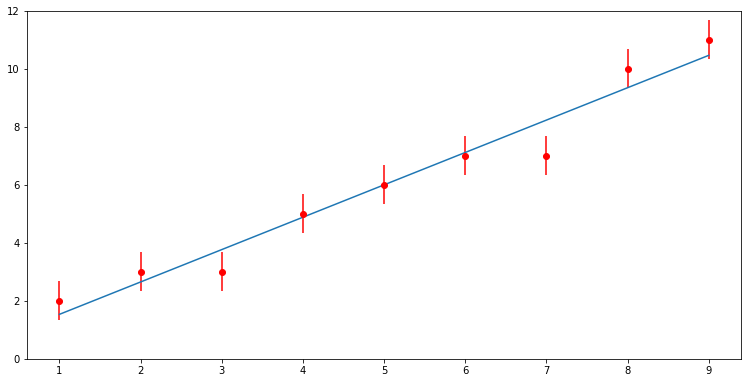

In [13]:
X = np.arange(1, 10, 1)
Y = np.array([2, 3, 3, 5, 6, 7, 7, 10, 11])
Z = np.polyfit(X, Y, 1)
p = np.poly1d(Z)

y = p(X)
plt.figure(figsize=(12.8, 6.4))
plt.ylim([0, 12])
plt.plot(X, y, '-')
plt.errorbar(X, Y, yerr=sigma_y(X, Y), fmt='ro')
plt.show()